### 1.5 Text Mining

In [2]:
# Import libraries

from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/katiedallarosa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/katiedallarosa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/katiedallarosa/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


#### Q3. Load the twentieth-century data that you scraped in Exercise 1.4.

In [3]:
# Set file

myfile = open('20th_century_Wiki.txt', encoding='utf-8') 

In [5]:
# Load data

with open('20th_century_Wiki.txt', 'r', errors='ignore') as file:
    data = file.read().replace('\n', '')

#### Q4. Tokenize the words from the text and create a bar chart to plot the 10 most common words.

In [6]:
# Sentence tokenization 

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent)

['Key events of the 20th century - WikipediaJump to contentMain menuMain menumove to sidebarhide\t\tNavigation\tMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate\t\tContribute\tHelpLearn to editCommunity portalRecent changesUpload fileSearchSearchAppearanceCreate accountLog inPersonal tools Create account Log in\t\tPages for logged out editors learn moreContributionsTalkContentsmove to sidebarhide(Top)1Historic events in the 20th centuryToggle Historic events in the 20th century subsection1.1The world at the beginning of the century1.1.1"The war to end all wars": World War I (1914–1918)1.1.2The Russian Revolution and Communism1.2Between the wars1.2.1Economic depression1.2.2The rise of dictatorship1.3Global war: World War II (1939–1945)1.3.1The war in Europe1.3.2Blitzkrieg1.3.3Operation Barbarossa1.3.4Turning tides1.3.5Operation Overlord1.3.6Final days1.3.7The war in the Pacific1.3.7.1Background1.3.8Japanese Expansion1.3.9Allied offensive1.3.10Final days1.3.11

In [7]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word)

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'WikipediaJump', 'to', 'contentMain', 'menuMain', 'menumove', 'to', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchAppearanceCreate', 'accountLog', 'inPersonal', 'tools', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'to', 'sidebarhide', '(', 'Top', ')', '1Historic', 'events', 'in', 'the', '20th', 'centuryToggle', 'Historic', 'events', 'in', 'the', '20th', 'century', 'subsection1.1The', 'world', 'at', 'the', 'beginning', 'of', 'the', 'century1.1.1', "''", 'The', 'war', 'to', 'end', 'all', 'wars', "''", ':', 'World', 'War', 'I', '(', '1914–1918', ')', '1.1.2The', 'Russian', 'Revolution', 'and', 'Communism1.2Between', 'the', 'wars1.2.1Economic', 'depression1.2.2The', 'rise', 'of', 'd

In [8]:
# Create frequency distribution

from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4882 samples and 20340 outcomes>


In [9]:
dist_words.most_common(10)

[('.', 1284),
 ('the', 1095),
 (',', 989),
 ('of', 604),
 ('and', 397),
 ('to', 326),
 ('The', 302),
 ('[', 302),
 (']', 302),
 ('in', 290)]

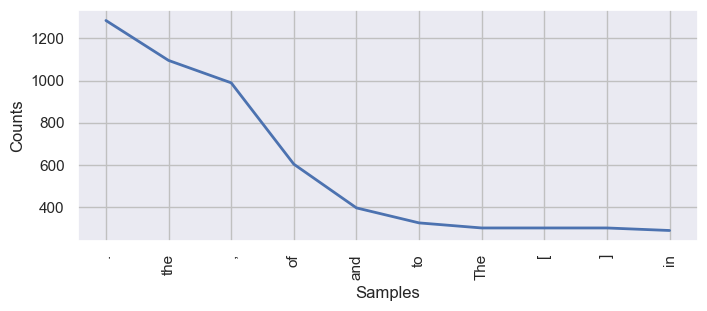

In [10]:
# Frequency Distribution Plot for 10 most common words

plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.show()

#### Q5. Remove stop words (and punctuation marks if necessary), and rerun the plot. What has changed? Comment on your impressions in a markdown cell under the plot.

In [11]:
# Defining stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'his', 'won', 'who', 'between', 'wasn', 'while', 'over', 'you', 'your', "it's", 'why', 'after', "couldn't", 'nor', 'them', 'don', 't', 'this', 'during', 'most', 'hasn', 'can', 'herself', 'with', 'which', 'but', 'm', 'in', 'should', 'until', 'up', 'very', 'or', 'ourselves', 'itself', 'how', 'we', 'yours', 'for', 'then', 'not', 'their', 'have', 'there', 'had', 'some', "don't", 'doesn', "you've", 'has', 'and', 'that', 'such', 'on', 'couldn', 'mustn', 'll', 'to', "shan't", 'each', 'out', 'above', 'yourselves', 've', 'all', 'being', 'than', 'of', 'against', 'me', 'i', 'myself', 'does', 'shan', 'other', 'himself', 'into', 'so', 'having', 's', "needn't", 'off', 'about', "aren't", "haven't", 'do', 'my', 'where', 'o', 'just', "you'll", 'the', 'she', 'again', 'own', 'now', 'needn', 'be', 'shouldn', 'whom', 'further', 'themselves', 'didn', "wasn't", "weren't", 'wouldn', "you'd", 'here', 'her', 'they', 're', 'an', 'will', "isn't", 'too', "wouldn't", 'was', 'its', 'doing', 'by', 'him', 'under', 'f

In [12]:
# Removing stopwords in words

filtered_words = [] # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [13]:
filtered_words

['Key',
 'events',
 '20th',
 'century',
 '-',
 'WikipediaJump',
 'contentMain',
 'menuMain',
 'menumove',
 'sidebarhide',
 'Navigation',
 'Main',
 'pageContentsCurrent',
 'eventsRandom',
 'articleAbout',
 'WikipediaContact',
 'usDonate',
 'Contribute',
 'HelpLearn',
 'editCommunity',
 'portalRecent',
 'changesUpload',
 'fileSearchSearchAppearanceCreate',
 'accountLog',
 'inPersonal',
 'tools',
 'Create',
 'account',
 'Log',
 'Pages',
 'logged',
 'editors',
 'learn',
 'moreContributionsTalkContentsmove',
 'sidebarhide',
 '(',
 'Top',
 ')',
 '1Historic',
 'events',
 '20th',
 'centuryToggle',
 'Historic',
 'events',
 '20th',
 'century',
 'subsection1.1The',
 'world',
 'beginning',
 'century1.1.1',
 "''",
 'The',
 'war',
 'end',
 'wars',
 "''",
 ':',
 'World',
 'War',
 'I',
 '(',
 '1914–1918',
 ')',
 '1.1.2The',
 'Russian',
 'Revolution',
 'Communism1.2Between',
 'wars1.2.1Economic',
 'depression1.2.2The',
 'rise',
 'dictatorship1.3Global',
 'war',
 ':',
 'World',
 'War',
 'II',
 '(',
 '19

In [14]:
# Create a new FreqDist for filtered_words

dist_words_filter = FreqDist(filtered_words)
print(dist_words_filter)

<FreqDist with 4778 samples and 15682 outcomes>


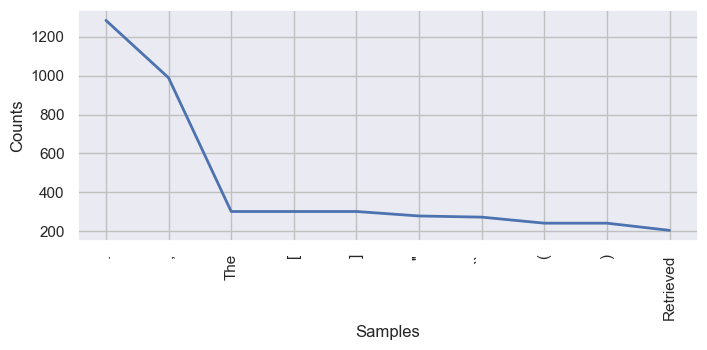

In [15]:
# Frequency Distribution Plot with removed stop words

plt.figure(figsize=(8, 3))
dist_words_filter.plot(10, cumulative = False)
plt.show()

In [16]:
dist_words_filter

FreqDist({'.': 1284, ',': 989, 'The': 302, '[': 302, ']': 302, "''": 279, '``': 273, '(': 242, ')': 242, 'Retrieved': 205, ...})

In [17]:
# Substitute all punctuations marks with a space 

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(filtered_words))

In [18]:
sans_punc

'  Key    events      th    century         WikipediaJump    contentMain    menuMain    menumove    sidebarhide    Navigation    Main    pageContentsCurrent    eventsRandom    articleAbout    WikipediaContact    usDonate    Contribute    HelpLearn    editCommunity    portalRecent    changesUpload    fileSearchSearchAppearanceCreate    accountLog    inPersonal    tools    Create    account    Log    Pages    logged    editors    learn    moreContributionsTalkContentsmove    sidebarhide         Top          Historic    events      th    centuryToggle    Historic    events      th    century    subsection   The    world    beginning    century               The    war    end    wars               World    War    I                                The    Russian    Revolution    Communism   Between    wars     Economic    depression     The    rise    dictatorship   Global    war         World    War    II                                The    war    Europe     Blitzkrieg     Operation    Ba

In [19]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2)

['Key', 'events', 'th', 'century', 'WikipediaJump', 'contentMain', 'menuMain', 'menumove', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchAppearanceCreate', 'accountLog', 'inPersonal', 'tools', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'sidebarhide', 'Top', 'Historic', 'events', 'th', 'centuryToggle', 'Historic', 'events', 'th', 'century', 'subsection', 'The', 'world', 'beginning', 'century', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'The', 'Russian', 'Revolution', 'Communism', 'Between', 'wars', 'Economic', 'depression', 'The', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'The', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'The', 'war', 'Pacific', 'Backgrou

In [20]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2)

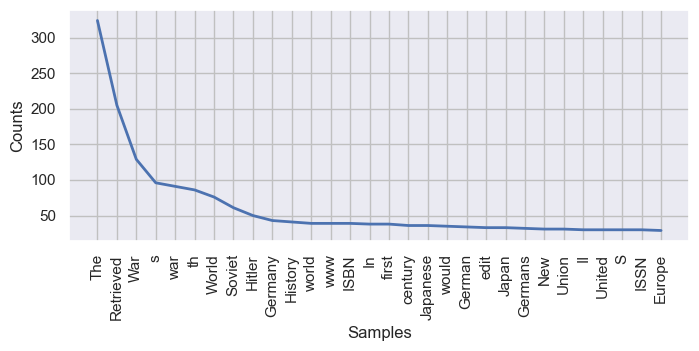

In [21]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(30, cumulative = False)
plt.show()

In [22]:
dist_words_filter_2.most_common(20)

[('The', 324),
 ('Retrieved', 205),
 ('War', 129),
 ('s', 96),
 ('war', 91),
 ('th', 86),
 ('World', 76),
 ('Soviet', 61),
 ('Hitler', 50),
 ('Germany', 43),
 ('History', 41),
 ('world', 39),
 ('www', 39),
 ('ISBN', 39),
 ('In', 38),
 ('first', 38),
 ('century', 36),
 ('Japanese', 36),
 ('would', 35),
 ('German', 34)]

#### Discussion
Although the results aren't perfect, filtering out all punctuation marks helps us see more of the common words mentioned in the text that are actually useful for analyzing. 

#### Q6. Create a tags list using TextBlob.

In [23]:
new_stopwords = ["Then", 'www', 'th', 's', 'The', "In", "would"]

In [24]:
filtered = []
for word in tokenized_word_2:
    if word not in new_stopwords:
        filtered.append(word)

In [25]:
%%time
text = TextBlob(str(filtered))

CPU times: user 10.6 ms, sys: 846 μs, total: 11.5 ms
Wall time: 11.9 ms


In [26]:
text

TextBlob("['Key', 'events', 'century', 'WikipediaJump', 'contentMain', 'menuMain', 'menumove', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchAppearanceCreate', 'accountLog', 'inPersonal', 'tools', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'sidebarhide', 'Top', 'Historic', 'events', 'centuryToggle', 'Historic', 'events', 'century', 'subsection', 'world', 'beginning', 'century', 'war', 'end', 'wars', 'World', 'War', 'I', 'Russian', 'Revolution', 'Communism', 'Between', 'wars', 'Economic', 'depression', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'war', 'Pacific', 'Background', 'Japanese', 'Expansion', 'Allied', 'offensive

In [27]:
tags_list = text.tags

In [28]:
tags_list

[('[', 'JJ'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'events", 'NNS'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'WikipediaJump", 'NNP'),
 ("'", 'POS'),
 ("'menumove", 'NNP'),
 ("'", 'POS'),
 ("'sidebarhide", 'NNP'),
 ("'", 'POS'),
 ("'Navigation", 'NN'),
 ("'pageContentsCurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsRandom", 'NNP'),
 ("'", 'POS'),
 ("'articleAbout", 'IN'),
 ("'WikipediaContact", 'NNP'),
 ("'", 'POS'),
 ("'usDonate", 'NNP'),
 ("'", 'POS'),
 ("'HelpLearn", 'NNP'),
 ("'", 'POS'),
 ("'editCommunity", 'NNP'),
 ("'", 'POS'),
 ("'portalRecent", 'NNP'),
 ("'", 'POS'),
 ("'fileSearchSearchAppearanceCreate", 'NNP'),
 ("'", 'POS'),
 ("'accountLog", 'NNP'),
 ("'", 'POS'),
 ("'inPersonal", 'NNP'),
 ("'", 'POS'),
 ("'tools", 'NNS'),
 ("'", 'POS'),
 ("'Create", 'NNP'),
 ("'", 'POS'),
 ("'account", 'NNP'),
 ("'", 'POS'),
 ("'Log", 'NNP'),
 ("'", 'POS'),
 ("'Pages", 'NNS'),
 ("'", 'POS'),
 ("'logged", 'VBD'),
 ("'editors", 'NNS'),
 ("'", 'POS'),
 ("'learn", 'NNP'),
 ("'", 'POS')

In [29]:
df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', "Word type"]

In [30]:
df_text.head()

,Words,Word type
0,[,JJ
1,'Key,NNP
2,',POS
3,'events,NNS
4,',POS


#### Q7. Create a list of the Top 10 POS tags for words that appear in the article.

In [31]:
df_t = df_text.groupby('Word type').count().reset_index()

In [32]:
df_t.head()

,Word type,Words
0,CC,1
1,CD,75
2,DT,13
3,EX,12
4,FW,43


In [33]:
top10 = df_t.nlargest(10, 'Words')

#### Q8. Plot this list in a bar chart using the seaborn library.

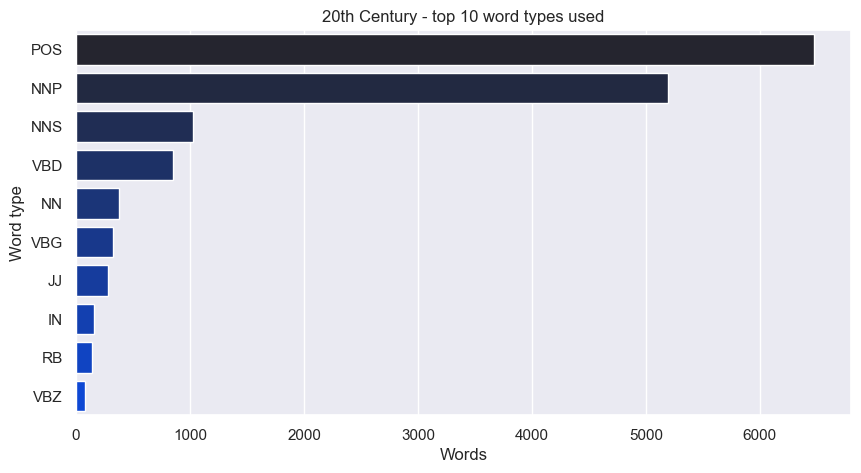

In [34]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x = "Words", y = "Word type",
    saturation = 0.9, data = top10).set_title("20th Century - top 10 word types used")

#### Q9. Create three bar plots with the top 15 POS labels—one each for nouns, verbs, and adjectives. Analyzing the results—what do you think stands out in these frequencies?

#### Nouns

In [35]:
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top10 = y.nlargest(10, 'Occurences')

In [36]:
top10

,Word,Occurences
1244,'War,129
2585,'war,91
1294,'World,76
1097,'Soviet,61
532,'Hitler,50
531,'History,41
2611,'world,39
557,'ISBN,39
1772,'first,38
1485,'century,36


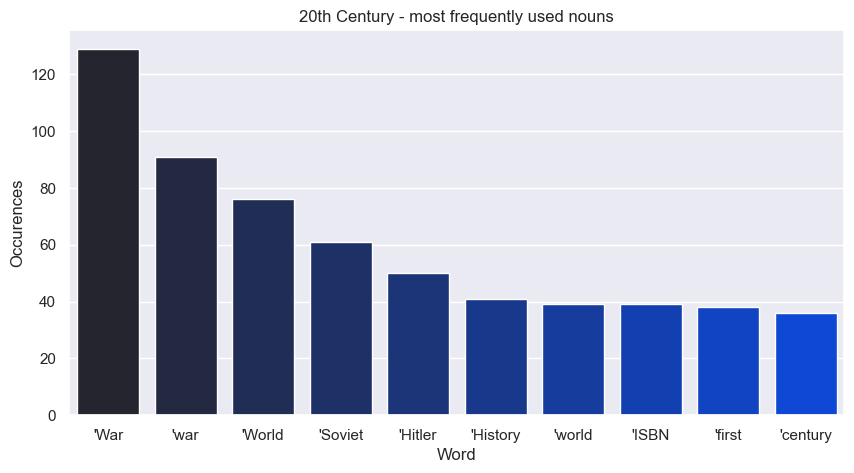

In [37]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data = top10).set_title("20th Century - most frequently used nouns")

#### Discussion
It's not surprising that War, World, Soviet, and Hitler are at the top of the list for nouns. During the 20th century, there were plenty of wars that took place as well at Hitler becoming the Chancellor of Germany.

#### Verbs

In [38]:
df = df_text[(df_text['Word type'] == "VB")  | (df_text['Word type'] == "VBD")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top10 = y.nlargest(10, 'Occurences')

In [39]:
top10

,Word,Occurences
27,'Retrieved,205
36,'United,30
0,'Allied,19
196,'led,15
316,'used,13
194,'launched,12
1,'Archived,10
93,'controlled,9
161,'forced,8
77,'changed,7


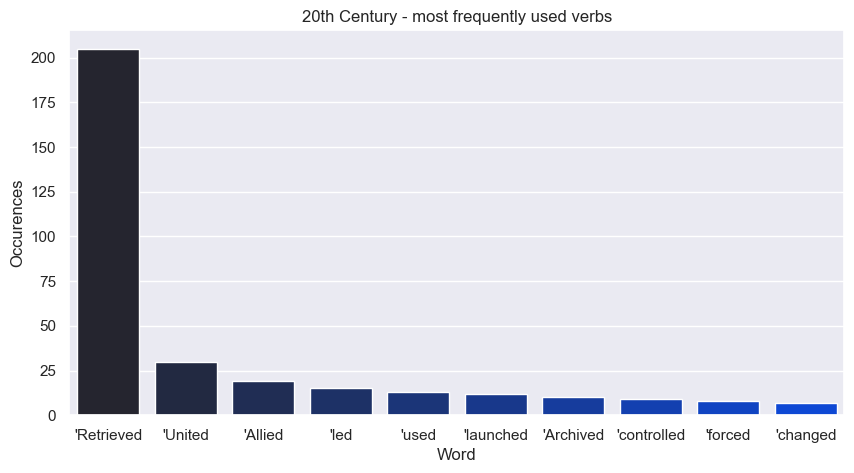

In [40]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x = "Word", y = "Occurences",
    saturation = 0.9, data = top10).set_title("20th Century - most frequently used verbs")

#### Discussion
It's interesting that Retrieved is among the top verbs mentioned in the text. It dominates the rest of the most-mentioned verbs and I wonder why that is. United, Allied, and led is to be expected due to the circumstances of the 20th century. 

#### Adjectives

In [41]:
df = df_text[df_text['Word type'] == "JJ"]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurences'], ascending=False)
top10 = y.nlargest(10, 'Occurences')

In [42]:
top10

,Word,Occurences
27,'Japanese,36
2,'American,24
5,'Atlantic,13
20,'Guardian,10
14,'Chinese,7
42,'Russian,6
103,'political,6
1,'African,6
104,'possible,5
7,'Baltic,5


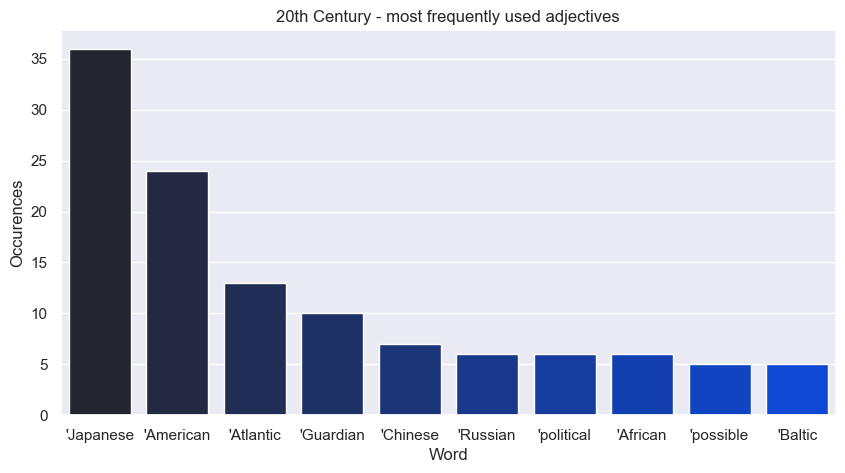

In [43]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data=top10).set_title("20th Century - most frequently used adjectives")

### Discussion
Again, due to the circumstances of the 20th century, it is not surprising that Japanese, American, and Chinese is listed towards the top for most-mentioned adjectives. There are a couple instances listed here that are not adjectives, but we know that's because this machine algorithm is not always 100% accurate.

#### Q10. Create a dataframe with the countries and the number of times they’re mentioned in your text

In [50]:
# Install pycountry library for list of countries

import pycountry

In [51]:
# Create a list of country names
country_list = [country.name for country in pycountry.countries]

# Read the text file
with open('20th_century_Wiki.txt', 'r') as file:
    text = file.read()

In [52]:
# Extract words from the text
words = re.findall(r'\b\w+\b', text)

# Filter out words that match country names (case insensitive)
filtered_countries = [word for word in words if word.capitalize() in country_list]

In [57]:
# Count the occurrences of each country
country_counts = Counter(filtered_countries)

# Create a DataFrame
df_countries = pd.DataFrame(country_counts.items(), columns=['Country', 'Times Mentioned'])

In [58]:
print(df_countries)

        Country  Times Mentioned
0        France               16
1       Germany               43
2       Austria                5
3       Hungary                3
4      Bulgaria                2
5       Ukraine                2
6         Italy               14
7         Spain                1
8        Poland               13
9       Estonia                2
10       Latvia                2
11    Lithuania                3
12      Finland                4
13      Belgium                2
14  Netherlands                2
15   Luxembourg                1
16      Denmark                3
17       Norway                5
18       Sweden                1
19       Greece                4
20      Albania                2
21      Belarus                1
22        Libya                5
23        Egypt                2
24         Iraq                1
25        Japan               33
26      Morocco                1
27      Algeria                1
28        China               10
29     Tha

#### Q11. Create a plot showing the frequency of the number of times these countries are mentioned in the text.

In [61]:
df_countries.shape

(54, 2)

In [63]:
print(df_countries.columns)

Index(['Country', 'Times Mentioned'], dtype='object')


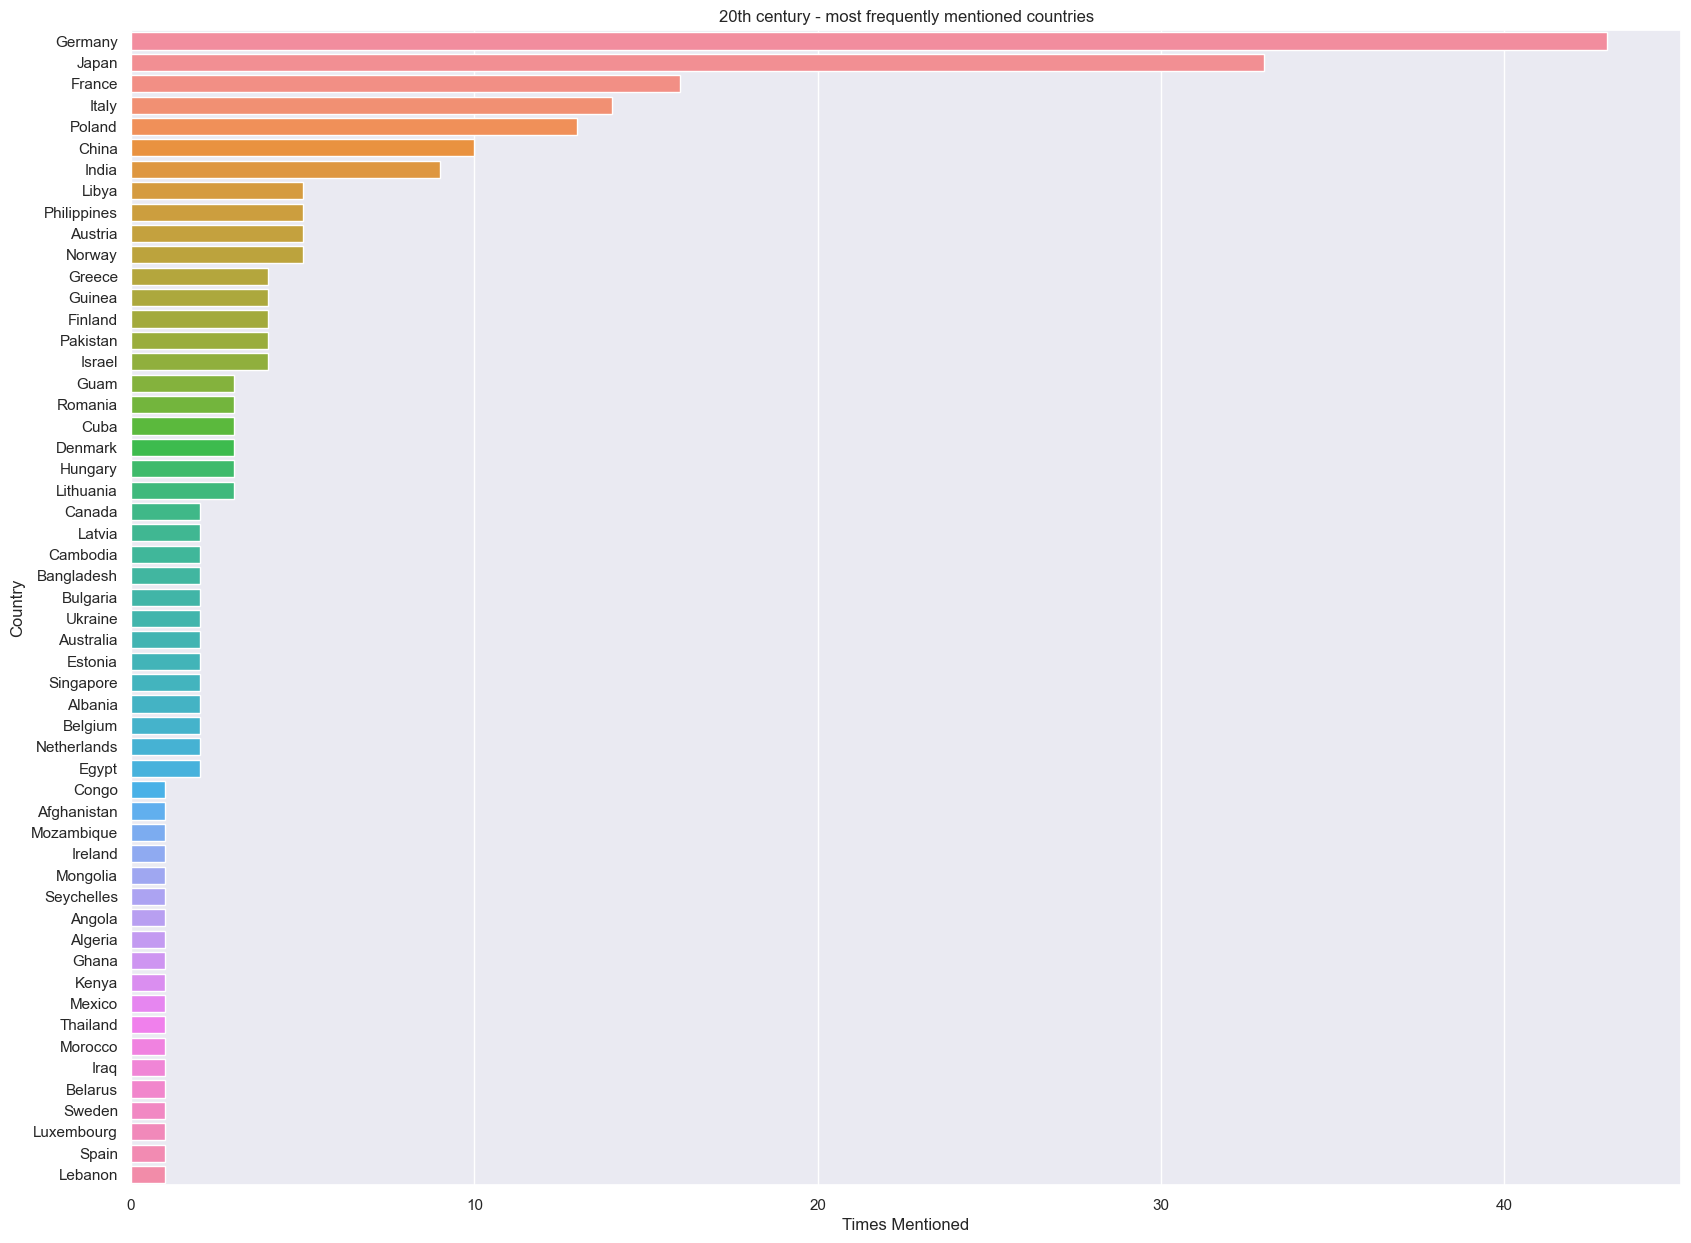

In [66]:
plt.figure(figsize=(20, 15))
with sns.dark_palette("#79C", 27):
    sns.barplot(x = "Times Mentioned", y = "Country",
    saturation=0.9, data = df_countries.sort_values("Times Mentioned", ascending = False)).set_title("20th century - most frequently mentioned countries")

In [69]:
df_countries.to_csv("countries.csv")

#### Discussion
Some of the biggest key events of the 20th century include WWI, WWII, The Great Depression, Hiroshima, and Adolf Hitler becoming the Chancellor of Germany. It is not surprising that Germany, Japan, France, and Italy are at the top of the list in mentions. The U.S. should be towards the top of the list as well, but I realize "America" is what is listed. Is there a way to add "America/American" to the list of countries so the list is accurate? 

In [67]:
# Sort the DataFrame and select the top 20 countries

top_20_countries = df_countries.sort_values("Times Mentioned", ascending=False).head(20)

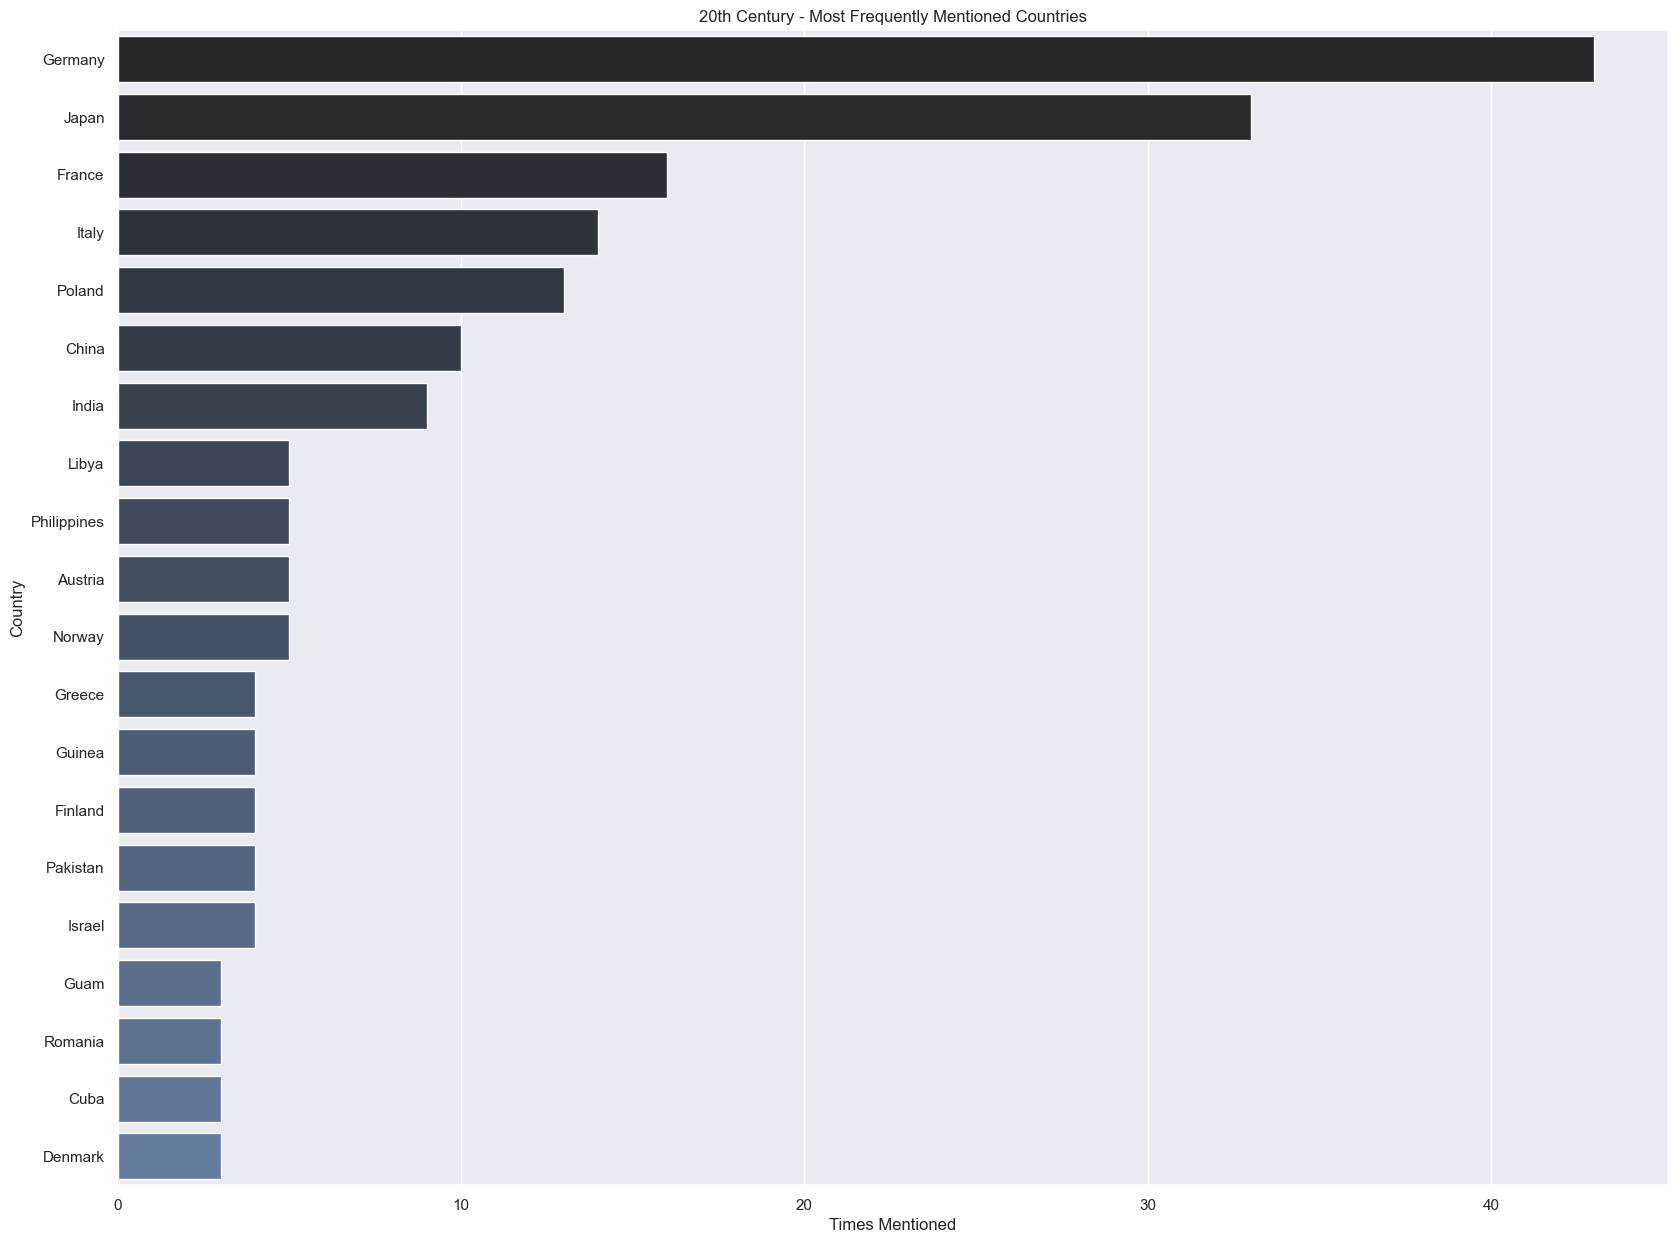

In [68]:
# Plot the top 20 countries

plt.figure(figsize=(20, 15))

with sns.dark_palette("#79C", 27):
    sns.barplot(
        x="Times Mentioned",
        y="Country",
        saturation=0.9,
        data=top_20_countries
    ).set_title("20th Century - Most Frequently Mentioned Countries")

# Show the plot

plt.show()

In [70]:
top_20_countries.to_csv("top20countries.csv")

#### Bonus task: Create a sentiment analysis of the twentieth-century key events from the text you scraped.

In [71]:
text_sent = TextBlob(str(filtered))

In [72]:
print(text_sent.sentiment)

Sentiment(polarity=0.04912987934051757, subjectivity=0.3542921312729818)


#### Discussion
Polarity is 0.049 which shows a neutral sentiment and Subjectivity is 0.354. This is pretty close to 0, which means the data scraped is factual. 